#### Import the modules

In [1]:
# import the modules you will need for this notebook
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
from matplotlib import colormaps
import netCDF4 as nc4
import cartopy
import cartopy.crs as ccrs
import cmocean.cm as cm

### Problem 10.1: ENSO Analysis
In this problem, identify two dates - one in an extreme El Nino and one in an extreme La Nina. The timeseries of the multivariate ENSO index, detailed [HERE](https://psl.noaa.gov/enso/mei/) is a helpful reference. When you have identified two dates, obtain the two Level 4 SSHA fields that correspond to those dates and create a figure with 3 subplots organized in a single column. The top row should show the El Nino conditions, the second row should show the La Nina conditions, and the final row should show the difference between the El Nino and La Nina conditions.

The plots should have the following attributes:
- global maps centered on the Pacific
- global projection using cartopy
- latitude/longitude lines and labels
- title
- colorbar with appropriate colormap (El Nino and La Nina plot should use same color bounds)

In [2]:
# define a path to your ssh data folder
data_folder = 'C:\\Users\\seamu\\ms274\\week6_sst\\ms274_hw6\\AVHRR'

In [3]:
file_path = 'C:\\Users\\seamu\\ms274\\week6_sst\\ms274_hw6\\AVHRR\\20231124120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc'

In [4]:
dm = nc4.Dataset(file_path)

In [5]:
#print(dm.variables.keys())

dict_keys(['lat', 'lon', 'time', 'lat_bnds', 'lon_bnds', 'analysed_sst', 'analysis_error', 'mask', 'sea_ice_fraction'])


In [6]:
#print(dm.variables['analysed_sst'])

<class 'netCDF4._netCDF4.Variable'>
int16 analysed_sst(time, lat, lon)
    long_name: analysed sea surface temperature
    standard_name: sea_surface_temperature
    units: kelvin
    _FillValue: -32768
    add_offset: 273.15
    scale_factor: 0.01
    valid_min: -300
    valid_max: 4500
    source: UNKNOWN,ICOADS BUOYS,ICOADS Argos,ICOADS SHIPS,MMAB_50KM-NCEP-ICE
    comment: Single-sensor Pathfinder 5.0/5.1 AVHRR SSTs used until 2005; two AVHRRs at a time are used 2007 onward; ACSPO after October 2021. Sea ice and in-situ data used also are near real time quality for recent period. SST (bulk) is at ambiguous depth because multiple types of observations are used.
unlimited dimensions: time
current shape = (1, 720, 1440)
filling on


In [7]:
# read in the data from each of the files above,
# for one of the files, also read in the lon/lat info
ssh_file = '20231124120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc'
ds = nc4.Dataset(data_folder+'\\'+ssh_file)
longitude = np.array(ds.variables['lon'])
latitude = np.array(ds.variables['lat'])

ds.close()


In [8]:
# define a function to compute average sea surface temperature
def compute_average_sst(file_path_list):

    # make the sum and count grids
    sum_grid = np.zeros((720, 1440))
    count_grid = np.zeros((720, 1440))

    # loop through the file paths and add the data from
    # each to the sun and count grids
    for file_path in file_path_list:
        
        # get the wind field from the file
        ds = nc4.Dataset(file_path)
        sst = np.array(ds.variables['analysed_sst'])
        ds.close()    
        sst= sst[0, :, :]
             
        # mask the wind field and add it to the array
        sst_masked = np.ma.masked_where(sst<-1000, sst)
        sst_mask = ~np.ma.getmaskarray(sst_masked)
        # add the wind field info to the sum and count grids
        sum_grid[sst_mask] = sum_grid[sst_mask] + sst[sst_mask]
        count_grid[sst_mask] = count_grid[sst_mask] + 1


    # compute the average grid
    averaged_grid = sum_grid
    averaged_grid[count_grid>0] = sum_grid[count_grid>0]/count_grid[count_grid>0]
    averaged_grid = np.ma.masked_where(count_grid==0, averaged_grid)

    # return the average grid
    return(averaged_grid)
    

In [9]:
file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][:6] == ('202305'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_2023_may_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][:6] == ('202306'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_2023_jun_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][:6] == ('202307'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_2023_jul_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][:6] == ('202308'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_2023_aug_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][:6] == ('202309'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_2023_sept_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][:6] == ('202310'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_2023_oct_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][:6] == ('202311'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_2023_nov_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][:4] == ('2023'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_2023_may_nov_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][4:6] == ('05'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_all_may_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][4:6] == ('06'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_all_jun_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][4:6] == ('07'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_all_jul_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][4:6] == ('08'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_all_aug_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][4:6] == ('09'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_all_sept_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][4:6] == ('10'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_all_oct_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][4:6] == ('11'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_all_nov_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][8:10] == ('12'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_all_may_nov_average = compute_average_sst(file_path_list)


kelvin = 273.15
#sst_values_array = np.array(sst_values)
sst_2023_may_average_celcius = sst_2023_may_average - kelvin
#print(sst_2023_may_average_celcius)
sst_2023_jun_average_celcius = sst_2023_jun_average - kelvin
#print(sst_2023_jun_average_celcius)
sst_2023_jul_average_celcius = sst_2023_jul_average - kelvin
#print(sst_2023_jul_average_celcius)
sst_2023_aug_average_celcius = sst_2023_aug_average - kelvin
#print(sst_2023_aug_average_celcius)
sst_2023_sept_average_celcius =sst_2023_sept_average - kelvin
#print(sst_2023_sept_average_celcius)
sst_2023_oct_average_celcius = sst_2023_oct_average - kelvin
#print(sst_2023_oct_average_celcius)
sst_2023_nov_average_celcius = sst_2023_nov_average - kelvin
#print(sst_2023_nov_average_celcius)
sst_2023_may_nov_average_celcius = sst_2023_may_nov_average - kelvin
#print(sst_2023_may_nov_average_celcius)
sst_all_may_average_celcius = sst_all_may_average - kelvin
sst_all_jun_average_celcius = sst_all_jun_average - kelvin
sst_all_jul_average_celcius = sst_all_jul_average - kelvin
sst_all_aug_average_celcius = sst_all_aug_average - kelvin
sst_all_sept_average_celcius = sst_all_sept_average - kelvin
sst_all_oct_average_celcius = sst_all_oct_average - kelvin
sst_all_nov_average_celcius = sst_all_nov_average - kelvin
sst_all_may_nov_average_celcius = sst_all_may_nov_average - kelvin
#print(sst_2023_may_nov_average_celcius)
#print(sst_all_may_nov_average_celcius)


Text(0.5, 0.98, 'Mean SST & SST Anomoly (May-Nov) 2023')

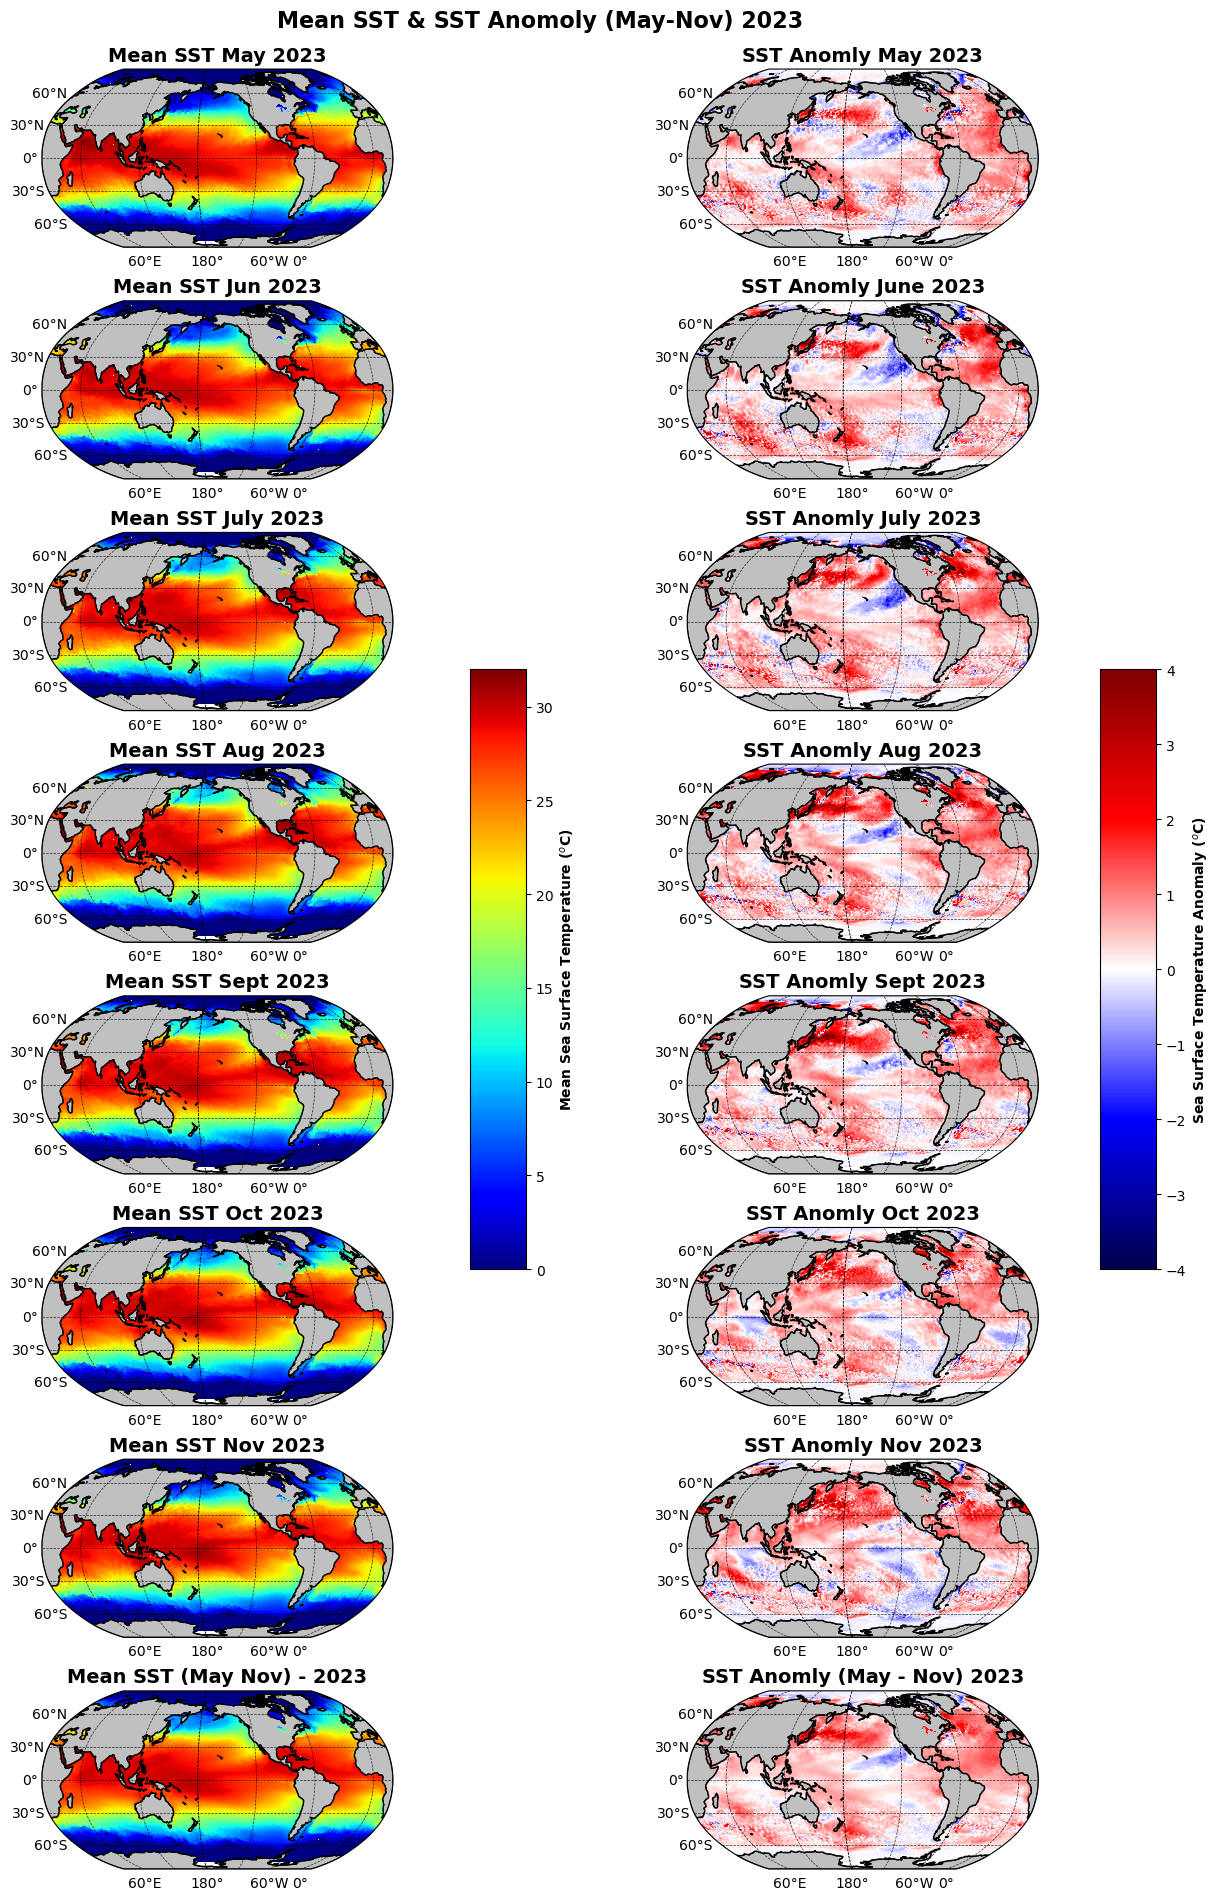

In [10]:
fig = plt.figure(figsize=(14,20))

# use a 5% border, 5% horizonal spacing and 1% vertical spacing
gs = GridSpec(8, 2, bottom = 0.05, top = 0.95, left = 0.05, right = 0.95, wspace = 0.05, hspace = 0.30)

axl = fig.add_subplot(gs[0,0], projection = ccrs.Robinson(central_longitude = -160)) #central_longitude = -180
c1 = axl.pcolormesh(longitude, latitude, sst_2023_may_average_celcius, transform=ccrs.PlateCarree(), cmap=plt.colormaps['jet'], vmin=0.0, vmax=32.0)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
axl.coastlines()
axl.set_title('Mean SST May 2023', fontsize='14', weight = 'bold')

axl = fig.add_subplot(gs[1,0], projection = ccrs.Robinson(central_longitude = -160))
axl.pcolormesh(longitude, latitude, sst_2023_jun_average_celcius, transform=ccrs.PlateCarree(), cmap=plt.colormaps['jet'], vmin=0.0, vmax=32.0)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axl.coastlines()
axl.set_title('Mean SST Jun 2023', fontsize='14', weight = 'bold')

axl = fig.add_subplot(gs[2,0], projection = ccrs.Robinson(central_longitude = -160))
axl.pcolormesh(longitude, latitude, sst_2023_jul_average_celcius, transform=ccrs.PlateCarree(), cmap=plt.colormaps['jet'], vmin=0.0, vmax=32.0)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axl.coastlines()
axl.set_title('Mean SST July 2023', fontsize='14', weight = 'bold')

axl = fig.add_subplot(gs[3,0], projection = ccrs.Robinson(central_longitude = -160))
axl.pcolormesh(longitude, latitude, sst_2023_aug_average_celcius, transform=ccrs.PlateCarree(), cmap=plt.colormaps['jet'], vmin=0.0, vmax=32.0)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axl.coastlines()
axl.set_title('Mean SST Aug 2023', fontsize='14', weight = 'bold')

axr = fig.add_subplot(gs[4,0], projection = ccrs.Robinson(central_longitude = -160))
cr = axr.pcolormesh(longitude, latitude, (sst_2023_sept_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['jet'], vmin=0.0, vmax=32.0)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axr.coastlines()
axr.set_title('Mean SST Sept 2023', fontsize='14', weight = 'bold')

axr = fig.add_subplot(gs[5,0], projection = ccrs.Robinson(central_longitude = -160)) #central_longitude = -180
axr.pcolormesh(longitude, latitude, (sst_2023_oct_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['jet'], vmin=0.0, vmax=32.0)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axr.coastlines()
axr.set_title('Mean SST Oct 2023', fontsize='14', weight = 'bold')

axr = fig.add_subplot(gs[6,0], projection = ccrs.Robinson(central_longitude = -160))
axr.pcolormesh(longitude, latitude, (sst_2023_nov_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['jet'], vmin=0.0, vmax=32.0)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axr.coastlines()
axr.set_title('Mean SST Nov 2023', fontsize='14', weight = 'bold')

axr = fig.add_subplot(gs[7,0], projection = ccrs.Robinson(central_longitude = -160))
axr.pcolormesh(longitude, latitude, (sst_2023_may_nov_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['jet'], vmin=0.0, vmax=32.0)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axr.coastlines()
axr.set_title('Mean SST (May Nov) - 2023', fontsize='14', weight = 'bold')

# color bar axis is set by x and y, and then width and height
# x = 0.44, y = 0.25
# use width = 0.05, use height = 0.5
cax = fig.add_axes([0.45, 0.35, 0.04, 0.3])
fig.colorbar(c1, cax=cax, orientation='vertical')
cax.set_ylabel('Mean Sea Surface Temperature ($^o$C)', fontsize='10', weight = 'bold')

axl = fig.add_subplot(gs[0,1], projection = ccrs.Robinson(central_longitude = -160)) #central_longitude = -180
c2 = axl.pcolormesh(longitude, latitude, (sst_2023_may_average_celcius-sst_all_may_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['seismic'], vmin=-4.0, vmax=4.0)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
axl.coastlines()
axl.set_title('SST Anomly May 2023', fontsize='14', weight = 'bold')

axl = fig.add_subplot(gs[1,1], projection = ccrs.Robinson(central_longitude = -160))
axl.pcolormesh(longitude, latitude, (sst_2023_jun_average_celcius-sst_all_jun_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['seismic'], vmin=-4.0, vmax=4.0)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axl.coastlines()
axl.set_title('SST Anomly June 2023', fontsize='14', weight = 'bold')

axl = fig.add_subplot(gs[2,1], projection = ccrs.Robinson(central_longitude = -160))
axl.pcolormesh(longitude, latitude, (sst_2023_jul_average_celcius-sst_all_jul_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['seismic'], vmin=-4.0, vmax=4.0)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axl.coastlines()
axl.set_title('SST Anomly July 2023', fontsize='14', weight = 'bold')

axl = fig.add_subplot(gs[3,1], projection = ccrs.Robinson(central_longitude = -160))
axl.pcolormesh(longitude, latitude, (sst_2023_aug_average_celcius-sst_all_aug_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['seismic'], vmin=-4.0, vmax=4.0)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axl.coastlines()
axl.set_title('SST Anomly Aug 2023', fontsize='14', weight = 'bold')

axr = fig.add_subplot(gs[4,1], projection = ccrs.Robinson(central_longitude = -160))
axr.pcolormesh(longitude, latitude, (sst_2023_sept_average_celcius-sst_all_sept_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['seismic'], vmin=-4.0, vmax=4.0)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axr.coastlines()
axr.set_title('SST Anomly Sept 2023', fontsize='14', weight = 'bold')

axr = fig.add_subplot(gs[5,1], projection = ccrs.Robinson(central_longitude = -160)) #central_longitude = -180
axr.pcolormesh(longitude, latitude, (sst_2023_oct_average_celcius-sst_all_oct_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['seismic'], vmin=-4.0, vmax=4.0)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axr.coastlines()
axr.set_title('SST Anomly Oct 2023', fontsize='14', weight = 'bold')

axr = fig.add_subplot(gs[6,1], projection = ccrs.Robinson(central_longitude = -160))
axr.pcolormesh(longitude, latitude, (sst_2023_nov_average_celcius-sst_all_nov_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['seismic'], vmin=-4.0, vmax=4.0)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axr.coastlines()
axr.set_title('SST Anomly Nov 2023', fontsize='14', weight = 'bold')

axr = fig.add_subplot(gs[7,1], projection = ccrs.Robinson(central_longitude = -160))
axr.pcolormesh(longitude, latitude, (sst_2023_may_nov_average_celcius-sst_all_may_nov_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['seismic'], vmin=-4.0, vmax=4.0)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axr.coastlines()
axr.set_title('SST Anomly (May - Nov) 2023', fontsize='14', weight = 'bold')

# color bar axis is set by x and y, and then width and height
# x = 0.915, y = 0.25
# # use width = 0.05, use height = 0.5
cax = fig.add_axes([0.90, 0.35, 0.04, 0.3])
fig.colorbar(c2, cax=cax, orientation='vertical')
cax.set_ylabel('Sea Surface Temperature Anomaly ($^o$C)', fontsize='10', weight = 'bold')

fig.suptitle('Mean SST & SST Anomoly (May-Nov) 2023', fontsize='16', weight = 'bold')


In [11]:
file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][:4] in ('1982'):
         file_path_list.append(data_folder+'\\'+file_name)  
#print(data_folder)
sst_1982_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][:4] in ('1997'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_1997_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][:4] in ('2009'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_2009_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][:4] in ('2015'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_2015_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][:4] in ('2023'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_2023_average = compute_average_sst(file_path_list)

file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[0][8:10] == ('12'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
sst_all_average = compute_average_sst(file_path_list)

kelvin = 273.15
#sst_values_array = np.array(sst_values)
sst_1982_average_celcius = sst_1982_average - kelvin
#print(sst_1982_average_celcius)
sst_1997_average_celcius = sst_1997_average - kelvin
#print(sst_1997_average_celcius)
sst_2009_average_celcius = sst_2009_average - kelvin
#print(sst_2009_average_celcius)
sst_2015_average_celcius = sst_2015_average - kelvin
#print(sst_2015_average_celcius)
sst_2023_average_celcius = sst_2023_average - kelvin
#print(sst_2023_average_celcius)
sst_all_average_celcius = sst_all_average - kelvin
#print(sst_all_average_celcius)


Text(0.5, 0.98, 'Mean SST & SST Anomaly (May-Nov) 1982, 1997, 2009, 2015, 2023 El Nino ')

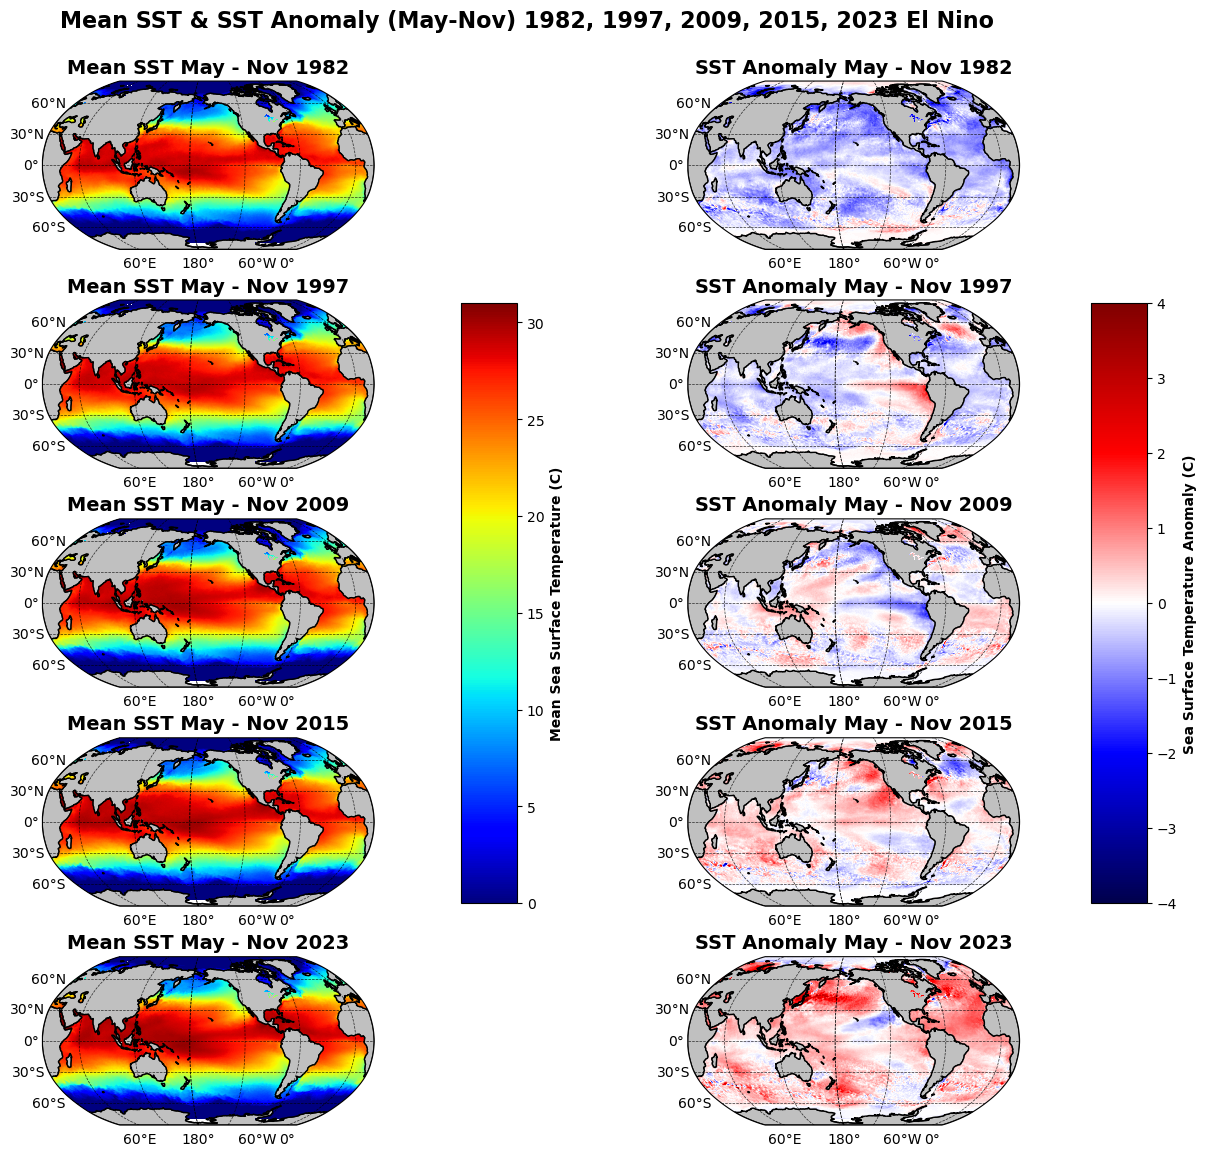

In [12]:
fig = plt.figure(figsize=(14,12))

# use a 5% border, 5% horizonal spacing and 1% vertical spacing
gs = GridSpec(5, 2, bottom = 0.05, top = 0.92, left = 0.05, right = 0.95, wspace = 0.05, hspace = 0.30)

axl = fig.add_subplot(gs[0,0], projection = ccrs.Robinson(central_longitude = -160)) #central_longitude = -180
c3 = axl.pcolormesh(longitude, latitude, sst_1982_average_celcius, transform=ccrs.PlateCarree(), cmap=plt.colormaps['jet'], vmin=0.0, vmax=31.0)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
axl.coastlines()
axl.set_title('Mean SST May - Nov 1982', fontsize='14', weight = 'bold')

axl = fig.add_subplot(gs[1,0], projection = ccrs.Robinson(central_longitude = -160))
axl.pcolormesh(longitude, latitude, sst_1997_average_celcius, transform=ccrs.PlateCarree(), cmap=plt.colormaps['jet'], vmin=0.0, vmax=31.0)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axl.coastlines()
axl.set_title('Mean SST May - Nov 1997', fontsize='14', weight = 'bold')

axl = fig.add_subplot(gs[2,0], projection = ccrs.Robinson(central_longitude = -160))
axl.pcolormesh(longitude, latitude, sst_2009_average_celcius, transform=ccrs.PlateCarree(), cmap=plt.colormaps['jet'], vmin=0.0, vmax=31.0)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axl.coastlines()
axl.set_title('Mean SST May - Nov 2009', fontsize='14', weight = 'bold')

axl = fig.add_subplot(gs[3,0], projection = ccrs.Robinson(central_longitude = -160))
axl.pcolormesh(longitude, latitude, sst_2015_average_celcius, transform=ccrs.PlateCarree(), cmap=plt.colormaps['jet'], vmin=0.0, vmax=31.0)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axl.coastlines()
axl.set_title('Mean SST May - Nov 2015', fontsize='14', weight = 'bold')

axl = fig.add_subplot(gs[4,0], projection = ccrs.Robinson(central_longitude = -160))
axl.pcolormesh(longitude, latitude, sst_2023_average_celcius, transform=ccrs.PlateCarree(), cmap=plt.colormaps['jet'], vmin=0.0, vmax=31.0)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axl.coastlines()
axl.set_title('Mean SST May - Nov 2023', fontsize='14', weight = 'bold')

# color bar axis is set by x and y, and then width and height
# x = 0.44, y = 0.235
# use width = 0.05, use height = 0.5
cax = fig.add_axes([0.45, 0.235, 0.04, 0.5])
fig.colorbar(c3, cax=cax, orientation='vertical')
cax.set_ylabel('Mean Sea Surface Temperature (C)', fontsize='10', weight = 'bold')

axr = fig.add_subplot(gs[0,1], projection = ccrs.Robinson(central_longitude = -160))
cr = axr.pcolormesh(longitude, latitude, (sst_1982_average_celcius-sst_all_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['seismic'], vmin=-4.0, vmax=4.0)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axr.coastlines()
axr.set_title('SST Anomaly May - Nov 1982', fontsize='14', weight = 'bold')

axr = fig.add_subplot(gs[1,1], projection = ccrs.Robinson(central_longitude = -160))
c4 = axr.pcolormesh(longitude, latitude, (sst_1997_average_celcius-sst_all_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['seismic'], vmin=-4.0, vmax=4.0)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axr.coastlines()
axr.set_title('SST Anomaly May - Nov 1997', fontsize='14', weight = 'bold')

axr = fig.add_subplot(gs[2,1], projection = ccrs.Robinson(central_longitude = -160))
axr.pcolormesh(longitude, latitude, (sst_2009_average_celcius-sst_all_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['seismic'], vmin=-4.0, vmax=4.0)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axr.coastlines()
axr.set_title('SST Anomaly May - Nov 2009', fontsize='14', weight = 'bold')

axr = fig.add_subplot(gs[3,1], projection = ccrs.Robinson(central_longitude = -160))
axr.pcolormesh(longitude, latitude, (sst_2015_average_celcius-sst_all_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['seismic'], vmin=-4.0, vmax=4.0)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axr.coastlines()
axr.set_title('SST Anomaly May - Nov 2015', fontsize='14', weight = 'bold')

axr = fig.add_subplot(gs[4,1], projection = ccrs.Robinson(central_longitude = -160))
axr.pcolormesh(longitude, latitude, (sst_2023_average_celcius-sst_all_average_celcius), transform=ccrs.PlateCarree(), cmap=plt.colormaps['seismic'], vmin=-4.0, vmax=4.0)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black')
axr.coastlines()
axr.set_title('SST Anomaly May - Nov 2023', fontsize='14', weight = 'bold')

# color bar axis is set by x and y, and then width and height
# x = 0.915, y = 0.235
# # use width = 0.05, use height = 0.5
cax = fig.add_axes([0.9, 0.235, 0.04, 0.5])
fig.colorbar(c4, cax=cax, orientation='vertical')
cax.set_ylabel('Sea Surface Temperature Anomaly (C)', fontsize='10', weight = 'bold')

fig.suptitle('Mean SST & SST Anomaly (May-Nov) 1982, 1997, 2009, 2015, 2023 El Nino ', fontsize='16', weight = 'bold')
